In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv'

In [5]:
covid = pd.read_csv(url)

In [8]:
covid.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [9]:
us_covid = covid.loc[covid['Country_Region'] == "US"]

In [10]:
us_covid

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2248,66000.0,NaN,Guam,US,2020-04-01 21:58:49,13.444300,144.793700,77,3,0,0,"Guam, US"
2275,NaN,NaN,Northern Mariana Islands,US,2020-04-01 21:58:49,15.097900,145.673900,6,1,0,0,",Northern Mariana Islands,US"
2281,NaN,NaN,Puerto Rico,US,2020-04-01 21:58:49,18.220800,-66.590100,286,11,0,0,"Puerto Rico, US"
2286,NaN,NaN,Recovered,US,2020-04-01 21:58:49,0.000000,0.000000,0,0,8474,0,"Recovered, US"


In [48]:
flight_url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'
fly_df = pd.read_csv(flight_url, names=['Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
                                        'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone','Type', 'Source'])

In [49]:
flight2 = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat'

flightdf = pd.read_csv(flight2, names=['Airline', 'Airline ID', 'Source airport', 'Source airport ID',
                                         'Destination airport', 'Destination airport ID', 'Codeshare', 
                                         'Stops', 'Equipment'])

In [42]:
country_total = []
for country in fly_df.Country.unique():
    
    data = fly_df.loc[fly_df.Country == country]
    listofAir = list(data.IATA)
    totalflights = len(flightdf.loc[flightdf['Destination airport'].isin(listofAir)])
    
    country_total.append((country, totalflights))
    

In [44]:
totals = pd.DataFrame(country_total, columns=['country', 'total'])

In [46]:
totals.sort_values(by='total', ascending=False)

,country,total
215,United States,13093
212,China,8159
17,United Kingdom,2637
57,Spain,2534
14,Germany,2336
...,...,...
39,British Indian Ocean Territory,0
128,Antarctica,0
141,Syria,0
220,Palestine,0


In [50]:
covid.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [51]:
country_covid = covid.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

In [54]:
country_covid['Country_Region'] = country_covid['Country_Region'].replace("US", "United States")

In [55]:
merge =  country_covid.merge(totals, left_on='Country_Region', right_on='country')

In [77]:
#sns.set_style("dark")

plt.style.use('seaborn-dark-palette')

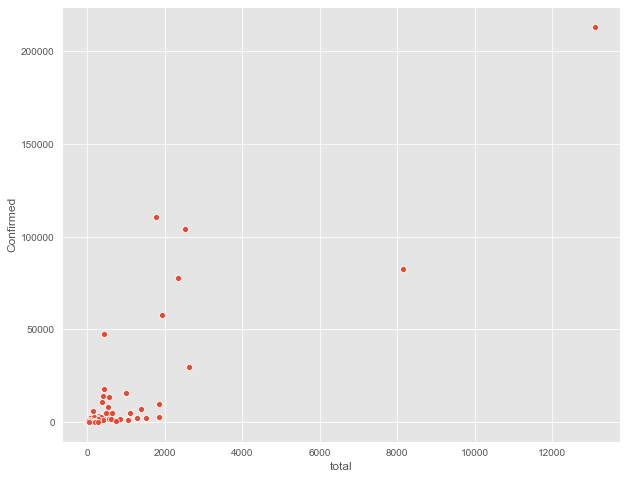

In [72]:
fig, ax=plt.subplots(figsize=(10,8))
#sns.set_style("dark")

sns.scatterplot(x='total', y='Confirmed', data=merge)

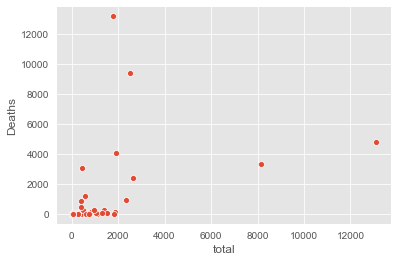

In [73]:
sns.scatterplot(x='total', y='Deaths', data=merge)

In [75]:
import numpy as np
merge['log_airports'] = np.log(merge['total'] +.1)

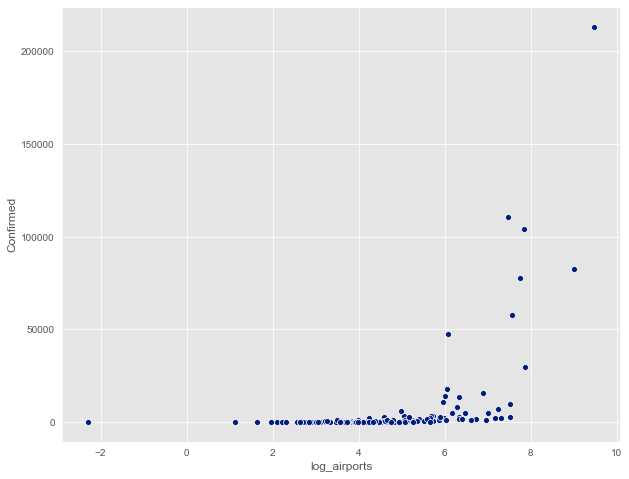

In [78]:
fig, ax=plt.subplots(figsize=(10,8))
#sns.set_style("dark")

sns.scatterplot(x='log_airports', y='Confirmed', data=merge)

In [79]:
merge.describe()

,Confirmed,Deaths,Recovered,Active,total,log_airports
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,5590.097561,283.731707,1139.250000,2897.189024,391.310976,4.557788
std,22743.382982,1392.862758,6657.713165,10571.311113,1267.326593,1.595009
min,1.000000,0.000000,0.000000,0.000000,0.000000,-2.302585
25%,19.000000,0.000000,0.750000,16.500000,34.750000,3.550975
50%,215.000000,3.000000,12.000000,176.000000,76.500000,4.338576
75%,1236.000000,26.250000,68.000000,1014.750000,250.000000,5.521766
max,213372.000000,13155.000000,76405.000000,80572.000000,13093.000000,9.479841


In [84]:
merge.sort_values(by=['Confirmed'], ascending=False).head(10).describe()

,Confirmed,Deaths,Recovered,Active,total,log_airports
count,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000
mean,75695.100000,4173.600000,17307.800000,34199.600000,3431.0000,7.602553
std,58876.679583,4121.558449,22188.234789,28355.006178,4045.9526,1.100962
min,15679.000000,277.000000,179.000000,0.000000,426.0000,6.054674
25%,34297.000000,1279.250000,4343.750000,14502.000000,1185.0000,7.042044
50%,67810.500000,3176.000000,13263.000000,28206.500000,2131.0000,7.659745
75%,98678.750000,4578.500000,18236.750000,54352.250000,2611.2500,7.867475
max,213372.000000,13155.000000,76405.000000,80572.000000,13093.0000,9.479841


In [87]:
states= us_covid.groupby('Province_State')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

In [90]:
states.sort_values(by=['Confirmed'], ascending=False).head(10)

,Province_State,Confirmed,Deaths,Recovered,Active
35,New York,83948,1941,0,0
33,New Jersey,22255,355,0,0
4,California,9399,199,0,0
25,Michigan,9315,335,0,0
24,Massachusetts,7738,122,0,0
16,Illinois,6980,141,0,0
10,Florida,6956,87,0,0
21,Louisiana,6424,273,0,0
42,Pennsylvania,6009,74,0,0
54,Washington,5608,234,0,0


In [91]:
us_covid

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2248,66000.0,NaN,Guam,US,2020-04-01 21:58:49,13.444300,144.793700,77,3,0,0,"Guam, US"
2275,NaN,NaN,Northern Mariana Islands,US,2020-04-01 21:58:49,15.097900,145.673900,6,1,0,0,",Northern Mariana Islands,US"
2281,NaN,NaN,Puerto Rico,US,2020-04-01 21:58:49,18.220800,-66.590100,286,11,0,0,"Puerto Rico, US"
2286,NaN,NaN,Recovered,US,2020-04-01 21:58:49,0.000000,0.000000,0,0,8474,0,"Recovered, US"
